In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Iterating

One of the most important tasks in computing is stepping through a sequence of data and performing a given action.

### Iterating via `for` Loop

In [2]:
x_vals = [1.,2,3]
for x in x_vals:
    print(x**2)

1.0
4
9


In [3]:
animals = ['dog', 'cat', 'bird']
res = [animal + 's' for animal in animals]
res

['dogs', 'cats', 'birds']

Suppose we want to simulate a time series $\{X_t\}_{t=0}^T$, which follows:

$$
X_{t+1} = \mu + \rho X_t + \sigma \varepsilon_{t+1},
\quad \{\varepsilon_t\} \sim N(0,1)
$$
where $X_0$ is given.

In [4]:
μ, ρ, σ = 1., 0.9, 0.5
X0 = 1.
T = 100
X_sim = np.empty(T)
X_sim[0] = X0

np.random.seed(123)

for t in range(T-1):
    X_sim[t+1] = μ + ρ* X_sim[t] + σ*np.random.randn()

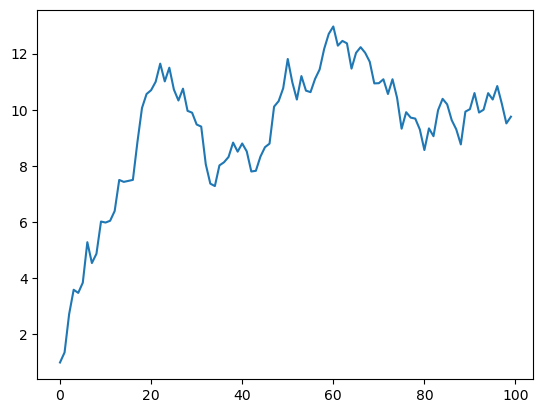

In [5]:
fig, ax = plt.subplots()
ax.plot(X_sim)
plt.show()

### Iterating via `while` Loop

In [6]:
i = 0
while i < 5:
    print('Hello world')
    i += 1

Hello world
Hello world
Hello world
Hello world
Hello world


Next we simulate a time sereis $\{\epsilon_t\}_{t=0}^{T}$ from $ N(0,1)$.

In [7]:
T = 100
ϵ_draws = []

np.random.seed(123)
t = 0
while t < T:
    ϵ_draws.append(np.random.randn())
    t += 1

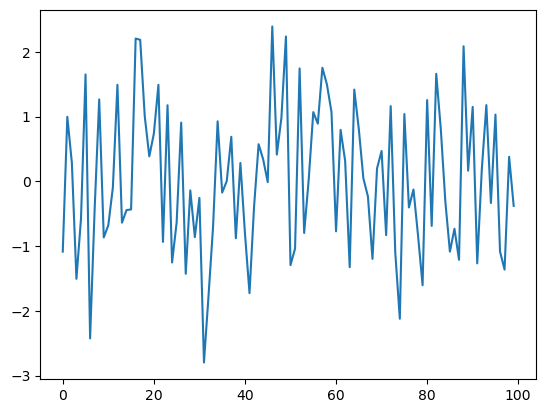

In [8]:
plt.plot(ϵ_draws)
plt.show()

## Functions

A function is a named section of a program that implements a specific task.

### Basic Syntax

In [9]:
def f(x1, x2):
    return x1 + (x2**2)

In [10]:
f(1.,2)

5.0

### Keyword Arguments

Keyword arguments are particularly useful when a function has a lot of arguments, in which case it’s hard to remember the right order.

The keyword argument values supplied in the function will become the default values.

In [11]:
def g(x1, x2=2, x3=3):
    return x1 + 2*x2 + 3*x3

In [12]:
g(2.)

15.0

In [13]:
g(2., 5)

21.0

In [14]:
g(1,3,2.)

13.0

In [15]:
g(1., x2=0, x3=1)

4.0

In [16]:
g(1., x3=1, x2=0)

4.0

In [17]:
g(x2=1., 1, x3=4)

SyntaxError: positional argument follows keyword argument (3096893382.py, line 1)

### One-Line Functions: `lambda`

The `lambda` keyword is used to create simple functions on one line.

In [18]:
f = lambda x1, x2: x1 + x2**2

In [19]:
f(1.,2)

5.0

In [20]:
g = lambda x1, x2=2, x3=3: x1 + 2*x2 + 3*x3

In [21]:
g(1., x3=1, x2=0)

4.0

### Note on  `*args` and `**kwargs` in Python Functions

In Python, we can pass a variable number of arguments to a function using special symbols:

- `*args` : for non keyword arguments
- `**kwargs` : for keyword arguments

We use them as arguments when we are not sure about the number of arguments to pass in the function.

#### Note on `*args`

In the function, we should use an asterisk `*` before the parameter name to pass variable length arguments.The arguments are passed as a tuple and these passed arguments make tuple inside the function with same name as the parameter excluding asterisk `*`.

In [22]:
def adder(x, y, z):
    return x + y + z

In [23]:
adder(1,2,3.)

6.0

In [24]:
adder(1,2,3,4.)

TypeError: adder() takes 3 positional arguments but 4 were given

In the following, we use `*vals` as a parameter which allows us to pass variable length argument list to the `adder()` function. 

In [25]:
def adder(*vals):
    res = 0
    for x in vals:
        res = res + x
    return res

In [26]:
adder(1,2,3,4.)

10.0

In [27]:
adder(1,2,3.)

6.0

In [28]:
adder(1.,2)

3.0

#### Note on `**kwargs`

We cannot use `*args` to pass keyword argument, but Python has got a solution for this called `**kwargs`, which allows us to pass the variable length of keyword arguments to the function.

In [29]:
def info(**data):
    print('Data Type: ', type(data))
    
    for key, val in data.items():
        print(f'\n{key}: {val}')

In [30]:
info(Firstname='Michael', Lastname='Jordan')

Data Type:  <class 'dict'>

Firstname: Michael

Lastname: Jordan


In [31]:
info(Firstname='Lebron', Lastname='James', Age='39')

Data Type:  <class 'dict'>

Firstname: Lebron

Lastname: James

Age: 39


In the above program, we have a function `intro()` with `**data` as a parameter. We passed two dictionaries with variable argument length to the `intro()` function. We have for loop inside `intro()` function which works on the data of passed dictionary and prints the value of the dictionary.

### Example

Create a function that simulates a time series $\{X_t\}_{t=0}^T$, which follows:

$$
X_{t+1} = \mu + \rho X_t + \sigma \varepsilon_{t+1},
\quad \{\varepsilon_t\} \sim N(0,1)
$$
where $X_0$ is given.

In [32]:
def compute_series(T, X0, μ=1, ρ=0.9, σ=0.5, seed=None):
    """
    Simulate a time series that follows AR(1).
    """
    X_sim = np.empty(T)
    X_sim[0] = X0
    
    if seed is not None:
        np.random.seed(seed)
        
    for t in range(T-1):
        X_sim[t+1] = μ + ρ*X_sim[t] + σ*np.random.randn()
    
    return X_sim

Next we plot the simulated time series for $X_0=1$ and different $(\rho,\sigma)$ values.

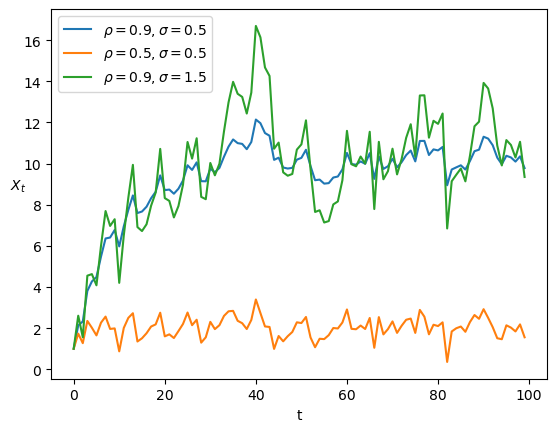

In [33]:
fig, ax = plt.subplots()

ρ_vals = [0.9, 0.5, 0.9]
σ_vals = [0.5, 0.5, 1.5 ]
T = 100

for i in range(len(ρ_vals)):
    ax.plot(compute_series(T=T, X0=1., μ=1, ρ=ρ_vals[i], 
                           σ=σ_vals[i], seed=1234), 
            label=f'$\\rho={ρ_vals[i]}, \\sigma={σ_vals[i]}$')

ax.set_xlabel('t')
ax.set_ylabel('$X_t$', rotation=0)
ax.legend()

plt.show()